In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\xueke\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
train = pd.read_csv('train.csv')

In [6]:
test = pd.read_csv('test.csv')

In [7]:
train.shape

(201917, 6)

In [8]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [9]:
test.shape

(123623, 5)

In [10]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [11]:
train.dtypes

first_active_month     object
card_id                object
feature_1               int64
feature_2               int64
feature_3               int64
target                float64
dtype: object

In [12]:
train.card_id.nunique() == train.shape[0] #make sure unique id

True

In [13]:
test.card_id.nunique() == test.shape[0]

True

In [14]:
train.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

In [15]:
test.isnull().sum()

first_active_month    1
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64

(array([2.2070e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00,
        4.0000e+00, 2.0000e+00, 4.0000e+00, 5.0000e+00, 3.0000e+00,
        3.0000e+00, 1.0000e+00, 9.0000e+00, 5.0000e+00, 5.0000e+00,
        2.4000e+01, 2.4000e+01, 2.6000e+01, 4.9000e+01, 8.6000e+01,
        9.7000e+01, 1.5400e+02, 2.6700e+02, 3.9900e+02, 5.8700e+02,
        9.0500e+02, 1.2420e+03, 1.8120e+03, 2.7140e+03, 3.9960e+03,
        6.2320e+03, 9.8760e+03, 1.6030e+04, 2.4734e+04, 3.6575e+04,
        3.3138e+04, 2.2418e+04, 1.3604e+04, 8.4210e+03, 5.3540e+03,
        3.5850e+03, 2.3860e+03, 1.6070e+03, 1.03

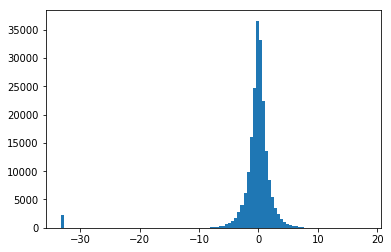

In [16]:
plt.figure()
plt.hist(train.target, bins  = 100)

In [18]:
(train.target < -30).sum() / (train.target.notnull()).sum() #odds

0.010930233709890698

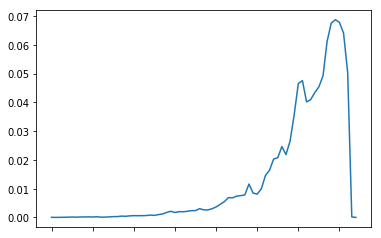

In [17]:
train.first_active_month.value_counts(normalize = True).sort_index().plot()


In [19]:
statistics = train.target.describe()

In [20]:
statistics

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

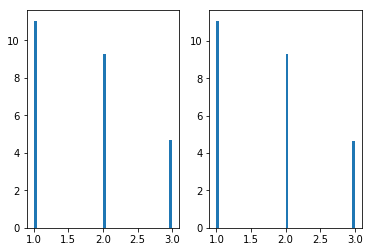

In [21]:
#train test feature distribution analysis
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = plt.hist(train.feature_2, bins  = 50, density = True)
ax2 = fig.add_subplot(122)
ax2 = plt.hist(test.feature_2, bins  = 50, density = True)

In [22]:
train.feature_2.value_counts(normalize = True).sort_index() #feature distribution check

1    0.441974
2    0.370642
3    0.187384
Name: feature_2, dtype: float64

In [23]:
test.feature_2.value_counts(normalize = True).sort_index()

1    0.443081
2    0.372042
3    0.184877
Name: feature_2, dtype: float64

In [24]:
train.feature_1.value_counts(normalize = True).sort_index()

1    0.059614
2    0.276336
3    0.364372
4    0.098481
5    0.201197
Name: feature_1, dtype: float64

In [25]:
test.feature_1.value_counts(normalize = True).sort_index()

1    0.059908
2    0.275960
3    0.361737
4    0.099755
5    0.202640
Name: feature_1, dtype: float64

In [26]:
train.feature_3.value_counts(normalize = True).sort_index()

0    0.434431
1    0.565569
Name: feature_3, dtype: float64

In [27]:
test.feature_3.value_counts(normalize = True).sort_index()

0    0.435623
1    0.564377
Name: feature_3, dtype: float64

In [28]:
features = list(train.columns)
features =['first_active_month','feature_1', 'feature_2', 'feature_3','target']

In [29]:
X = train.loc[:, features]
Y = train.loc[:, ['target']]

In [30]:
def combine_feature(feature1, feature2):
    feature1 = feature1.astype(str).values.tolist()
    feature2 = feature2.astype(str).values.tolist()
    return pd.Series([feature1[i]+'&'+feature2[i] for i in range(len(feature1))])
    

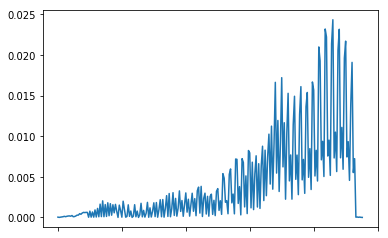

In [31]:
train_com12 = combine_feature(X.first_active_month, X.feature_1) #combined features distribution
train_com12.value_counts(normalize = True).sort_index().plot()

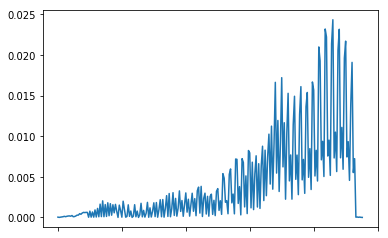

In [32]:
test_com12 = combine_feature(X.first_active_month, X.feature_1) 
test_com12.value_counts(normalize = True).sort_index().plot()

In [33]:
merch = pd.read_csv('merchants.csv')

In [34]:
merch.shape

(334696, 22)

In [35]:
merch.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [36]:
merch.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

In [37]:
merch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
merchant_id                    334696 non-null object
merchant_group_id              334696 non-null int64
merchant_category_id           334696 non-null int64
subsector_id                   334696 non-null int64
numerical_1                    334696 non-null float64
numerical_2                    334696 non-null float64
category_1                     334696 non-null object
most_recent_sales_range        334696 non-null object
most_recent_purchases_range    334696 non-null object
avg_sales_lag3                 334683 non-null float64
avg_purchases_lag3             334696 non-null float64
active_months_lag3             334696 non-null int64
avg_sales_lag6                 334683 non-null float64
avg_purchases_lag6             334696 non-null float64
active_months_lag6             334696 non-null int64
avg_sales_lag12                334683 non-null float64
avg_purchases_lag12    

In [38]:
merch_explain = pd.read_excel('Data_Dictionary.xlsx', header = 2, sheet_name = 'merchant')
merch_explain

,Columns,Description
0,merchant_id,Unique merchant identifier
1,merchant_group_id,Merchant group (anonymized )
2,merchant_category_id,Unique identifier for merchant category (anony...
3,subsector_id,Merchant category group (anonymized )
4,numerical_1,anonymized measure
5,numerical_2,anonymized measure
6,category_1,anonymized category
7,most_recent_sales_range,Range of revenue (monetary units) in last acti...
8,most_recent_purchases_range,Range of quantity of transactions in last acti...
9,avg_sales_lag3,Monthly average of revenue in last 3 months di...


In [39]:
merch.isnull().sum()

merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

In [40]:
m_nmrc_cols = [ 'numerical_1', 'numerical_2', 
               'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3', 
               'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
               'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12']
m_ctgy_cols = ['merchant_id', 'merchant_group_id', 'merchant_category_id', 'subsector_id',  'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range', 'category_4', 'city_id', 'state_id', 'category_2']
assert len(m_ctgy_cols) + len(m_nmrc_cols) == merch.shape[1]

In [41]:
merch[m_ctgy_cols].nunique()

merchant_id                    334633
merchant_group_id              109391
merchant_category_id              324
subsector_id                       41
category_1                          2
most_recent_sales_range             5
most_recent_purchases_range         5
category_4                          2
city_id                           271
state_id                           25
category_2                          5
dtype: int64

In [42]:
merch[m_nmrc_cols].describe()

,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
count,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000
mean,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335
std,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138
min,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000
25%,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000
50%,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000
75%,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000
max,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000


In [43]:
def convert_object(se):
    value = se.unique().tolist()
    value.sort()
    return se.map(pd.Series(range(len(value)),index = value)).values

In [44]:
for col in ['category_1', 'most_recent_sales_range', 'most_recent_purchases_range', 'category_4']:
    merch[col] = convert_object(merch[col])

In [45]:
merch.dtypes

merchant_id                     object
merchant_group_id                int64
merchant_category_id             int64
subsector_id                     int64
numerical_1                    float64
numerical_2                    float64
category_1                       int64
most_recent_sales_range          int64
most_recent_purchases_range      int64
avg_sales_lag3                 float64
avg_purchases_lag3             float64
active_months_lag3               int64
avg_sales_lag6                 float64
avg_purchases_lag6             float64
active_months_lag6               int64
avg_sales_lag12                float64
avg_purchases_lag12            float64
active_months_lag12              int64
category_4                       int64
city_id                          int64
state_id                         int64
category_2                     float64
dtype: object

In [46]:
inf_cols = ['avg_purchases_lag3', 'avg_purchases_lag6', 'avg_purchases_lag12']

In [47]:
merch['avg_purchases_lag3'] = merch['avg_purchases_lag3'].replace(np.inf,merch['avg_purchases_lag3'].loc[merch['avg_purchases_lag3']!=np.inf].max()) #replace inf

In [48]:
merch['avg_purchases_lag3'].max()

61851.33333333

In [49]:
merch['avg_purchases_lag6'] = merch['avg_purchases_lag6'].replace(np.inf,merch['avg_purchases_lag6'].loc[merch['avg_purchases_lag6']!=np.inf].max())

In [50]:
merch['avg_purchases_lag12'] = merch['avg_purchases_lag12'].replace(np.inf,merch['avg_purchases_lag12'].loc[merch['avg_purchases_lag12']!=np.inf].max())

In [51]:
merch[m_nmrc_cols].describe()

,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12
count,334696.000000,334696.000000,334683.000000,334696.000000,334696.000000,3.346830e+05,334696.000000,334696.000000,3.346830e+05,334696.000000,334696.000000
mean,0.011476,0.008103,13.832993,2.145143,2.994108,2.165079e+01,2.390194,5.947397,2.522771e+01,2.529277,11.599335
std,1.098154,1.070497,2395.489999,213.955844,0.095247,3.947108e+03,194.324264,0.394936,5.251842e+03,174.419034,1.520138
min,-0.057471,-0.057471,-82.130000,0.333495,1.000000,-8.213000e+01,0.167045,1.000000,-8.213000e+01,0.098330,1.000000
25%,-0.057471,-0.057471,0.880000,0.923650,3.000000,8.500000e-01,0.902247,6.000000,8.500000e-01,0.898333,12.000000
50%,-0.057471,-0.057471,1.000000,1.016667,3.000000,1.010000e+00,1.026961,6.000000,1.020000e+00,1.043361,12.000000
75%,-0.047556,-0.047556,1.160000,1.146522,3.000000,1.230000e+00,1.215575,6.000000,1.290000e+00,1.266480,12.000000
max,183.735111,182.079322,851844.640000,61851.333333,3.000000,1.513959e+06,56077.500000,6.000000,2.567408e+06,50215.555556,12.000000


In [52]:
history_trans = pd.read_csv('historical_transactions.csv')

In [53]:
history_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [54]:
history_trans.shape

(29112361, 14)

In [55]:
history_trans.dtypes

authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
installments              int64
category_3               object
merchant_category_id      int64
merchant_id              object
month_lag                 int64
purchase_amount         float64
purchase_date            object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

In [56]:
history_trans.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.645950e+07,2.911236e+07,2.911236e+07
mean,1.293256e+02,6.484954e-01,4.810130e+02,-4.487294e+00,3.640090e-02,2.194578e+00,1.056679e+01,2.684839e+01
std,1.042563e+02,2.795577e+00,2.493757e+02,3.588800e+00,1.123522e+03,1.531896e+00,6.366927e+00,9.692793e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,9.000000e+01,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.000000e+00,1.600000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,0.000000e+00,6.010604e+06,5.000000e+00,2.400000e+01,4.100000e+01


In [57]:
history_trans.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

In [58]:
new_trans = pd.read_csv('new_merchant_transactions.csv')

In [59]:
new_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [60]:
new_trans.shape

(1963031, 14)

In [61]:
new_trans.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.851286e+06,1.963031e+06,1.963031e+06
mean,1.343867e+02,6.829643e-01,4.309701e+02,1.476515e+00,-5.509690e-01,2.197841e+00,1.088067e+01,2.597624e+01
std,1.015152e+02,1.584069e+00,2.463385e+02,4.994483e-01,6.940043e-01,1.528125e+00,6.038542e+00,1.012908e+01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-7.468928e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,6.900000e+01,0.000000e+00,2.780000e+02,1.000000e+00,-7.166294e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,1.100000e+02,1.000000e+00,3.670000e+02,1.000000e+00,-6.748406e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,6.830000e+02,2.000000e+00,-5.816162e-01,3.000000e+00,1.500000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,2.000000e+00,2.631575e+02,5.000000e+00,2.400000e+01,4.100000e+01


In [62]:
new_trans.dtypes

authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
installments              int64
category_3               object
merchant_category_id      int64
merchant_id              object
month_lag                 int64
purchase_amount         float64
purchase_date            object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

In [63]:
duplicate_cols = []
for col in merch.columns:
    if col in new_trans.columns:
        duplicate_cols.append(col)
duplicate_cols

['merchant_id',
 'merchant_category_id',
 'subsector_id',
 'category_1',
 'city_id',
 'state_id',
 'category_2']

In [64]:
new_trans[duplicate_cols].shape

(1963031, 7)

In [65]:
new_trans[duplicate_cols].drop_duplicates().shape

(291242, 7)

In [66]:
new_trans.merchant_id.nunique()

226129

In [70]:
n_time_col = ['purchase_date']
n_ctgr_col = ['authorized_flag', 'card_id','city_id', 'category_1', 'category_3','merchant_category_id', 'merchant_id', 'category_2', 'state_id', 'subsector_id']
n_nmrc_col = [ 'installments',  'month_lag', 'purchase_amount']

In [68]:
for item in ['authorized_flag', 'category_1', 'category_3']:
    new_trans[item] = convert_object(new_trans[item])

TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
new_trans['category_3'].value_counts(dropna = False)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(['A', 'B', 'C'])

In [ ]:
le.transform(new_trans['category_3'])

In [ ]:
le.fit(['A', 'B', 'C', 'D']).transform(new_trans['category_3'].fillna('D'))

In [ ]:
new_trans['purchase_date'].dtypes

In [71]:
new_trans[n_ctgr_col].dtypes

authorized_flag           int64
card_id                  object
city_id                   int64
category_1                int64
category_3               object
merchant_category_id      int64
merchant_id              object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

In [73]:
new_trans[n_nmrc_col].dtypes

installments         int64
month_lag            int64
purchase_amount    float64
dtype: object

In [72]:
new_trans[n_ctgr_col].isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
category_3               55922
merchant_category_id         0
merchant_id              26216
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

In [74]:
new_trans[n_nmrc_col].isnull().sum()

installments       0
month_lag          0
purchase_amount    0
dtype: int64

In [77]:
new_trans[n_ctgr_col] = new_trans[n_ctgr_col].fillna(-1)

In [78]:
import gc
import time
from datetime import datetime

In [80]:
se_map = convert_object(train['first_active_month'].append(test['first_active_month']).astype(str))

In [81]:
train['first_active_month'] = se_map[:train.shape[0]]
test['first_active_month'] = se_map[train.shape[0]:]

In [82]:
train.to_csv('train_pre.csv')
test.to_csv('test_pre.csv')

In [83]:
del train
del test

In [84]:
gc.collect()

156

In [91]:
history_trans['purchase_date'].head()

0    2017-06-25 15:33:07
1    2017-07-15 12:10:45
2    2017-08-09 22:04:29
3    2017-09-02 10:06:26
4    2017-03-10 01:14:19
Name: purchase_date, dtype: object

In [88]:
history_trans['purchase_month'] = history_trans['purchase_date'].apply(lambda x:'-'.join(x.split(' ')[0].split('-')[:2])) #Y-M

In [90]:
history_trans['purchase_day'] = history_trans['purchase_date'].apply(lambda x: datetime.strptime(x.split(' ')[0], '%Y-%m-%d').weekday())//5
# workday/weekend

In [93]:
history_trans['purchase_hour'] = history_trans['purchase_date'].apply(lambda x: x.split(' ')[1].split(':')[0]).astype(int)//6
# midnight/am./pm./night